DACCS 690P Python Final Project

By Erica Laidler

American Airlines Stock Market Predicton with ARIMA and VAR Time Series Modeling




In [ ]:
!pip install pmdarima
!pip install statsmodels
!pip install mplfinance
import requests
import json
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Introduction

Stocks, like natural disasters, human behavior, and biological evolution, are notoriously difficult to predict. The stock market is subject to various forces, incuding interest rates, corporate earnings, and global economic conditions, which are complex, variable, and interconnected. Also, the buying and selling of stocks relies on human decision-making, which can be irrational and inconsistent. Some market participants even intentionally manipulate stock prices by engaging in illegal trading or the spreading of false market rumors (Vstar).

Another complication is that stocks are constantly evolving, as are the variables which affect them. Markets are often subject to non-stationary distributions. Data points are stationary when attributes of the data do not change over time. However, the means, variances, and covariances of non-stationary data change over time, making them harder to analyze and predict (Iordanova).

Methods for predicting stock market trends tend to align with one of a few potential perspectives. The first perspective is that individual stocks have momentum, meaning that stocks which performed well in the past and generated more public interest are more likely to continue to perform well in the future.

Another, contrasting, perspective is related to mean reversion. According to Yates, in his article, "Four Ways to Predict Market Performance", mean reversion refers to the tendency of a variable, such as a stock price, "to converge on an average value over time." This suggests that stocks which are performing well are likely to fall again eventually. This contradicts the momentum perspective, because it suggests that the high performance of a stock is not necessary any indication of its continual growth, and in fact may even be a sign that it is destined to eventually head in the opposite direction (Yates).

The Random Walk Theory opposes both of the first two perspectives. This theory suggests that "changes in asset prices are random" (Yates). It claims that stock prices are fully unpredictable, and it is impossible to use past prices to predict future prices. Related to this theory is the Efficient Market Hypothesis (EMH), which suggests that markets are efficient, and thus stock prices already contain all the relevant information available to inform prediction. Therefore, by this hypothesis, the best method for predicting future price is to simply observe the current market price (Yates).

The inherent difficulty of stock market prediction, and even claims that prediction is outright impossible, have not prevented countless attempts to perform the task. The prospect of developing a model which accurately predicts market trends appeals to many, as it would be a lucrative advancement. Investors and traders with access to accurate predictions could make informed investment decisions about when to buy or sell stocks, thus optimizing profit and minimizing risk. It woud be also very useful for economists, government policymakers, and researchers seeking to understand the state of the stock market and its important role in society.

There are many different strategies which analysts have implemented in the past. In 2020, Vijh et. al implemented an Artificial Neural Network and Random Forest technique for predicting the next day closing price in five companies from various industries, using the high, low, open, and close stock prices as variables. They found that both strategies were effective (Vstar). In 2021, Rouf et. al performed a study to compare the accuracy of various machine learning approaches for stock market-related prediction tasks. These techniques included Artificial Neural Networks, a Support Vector Machine, Naive Bayes classification, Genetic Algorithms, Fuzzy Algorithms, Deep Neural Networks, Regression Algorithms, and hybrid approaches. They concluded that no single technique that can "promise optimal results" (Rouf). In 2022, Khumar et. al utilized Time Series Analysis on historical stock data to forecast future trend in the closing prices of a particular stock. They compared the predictive accuracy of ARIMA, the ETS model, and the Facebook Prophet Model, finding the latter to be the most reliable.

In this project, I also perform Time Series Analysis. This approach aligns with the perspective of momentum, the idea that past trends observed in the stock market are, to some extent, likely to persist or are at least useful in informing future predictions.

I gather data on the American Airlines stock in recent years, and implement an Autoregressive Integrated Moving Average (ARIMA) time series model and an Vector Autoregressive (VAR) time series model to predict the 'close' variable, or the closing price of the American Airlines stock.

# Data Collection

The first step is to import the data. The data comes from a financial data API on The Financial Modeling Prep website, which offers a wide array of data in various formats. The data I used came from the Daily Chart endpoint, which contains stock market statistics for every day at a given company. The chart provides the daily opening price, high price, low price, closing price, and other variables of the company's stock over a period of time.

I took the Daily Chart data for American Airlines from November 31, 2018 to today.

In [ ]:
#Import stock data for American Airlines from Nov 31, 2018-today using Financial Modeling API

# Construct the API request URL.
API_base_url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAL"
API_key = "?apikey=biudfPepGDD3Oyx5EPlAxPJHkUOYq4L6"
search_url = API_base_url + API_key

# Send GET request to specified API url to retrieve data.
# 'r' will contain the response, and 'r_dict' will contain the parsed JSON data.
r = requests.get(search_url)
r_dict = r.json()

#Get list of dates, as well as open, high, low, close, adjClose, volume, unadjustedVolume, change, changePercent, vwap, label, and change over time
# values for all stock data provided

# Initialize lists for all the variables provided.
# The variables include date, open, high, low, close, adjusted close, volume, unadjusted volume, change, change percent, vwap, label, and change over time.
date_list = []
open_list = []
high_list = []
low_list = []
close_list = []
adjClose_list = []
volume_list = []
unadjustedVolume_list = []
change_list = []
changePercent_list = []
vwap_list = []
label_list = []
changeOverTime_list = []

# Iterate over historical data in 'r_dict' and extract data points, appending them to all of the above lists.
for i in range(0, len(r_dict['historical'])):
    date_list.append(r_dict['historical'][i]['date'])
    open_list.append(r_dict['historical'][i]['open'])
    high_list.append(r_dict['historical'][i]['high'])
    low_list.append(r_dict['historical'][i]['low'])
    close_list.append(r_dict['historical'][i]['close'])
    adjClose_list.append(r_dict['historical'][i]['adjClose'])
    volume_list.append(r_dict['historical'][i]['volume'])
    unadjustedVolume_list.append(r_dict['historical'][i]['unadjustedVolume'])
    change_list.append(r_dict['historical'][i]['change'])
    changePercent_list.append(r_dict['historical'][i]['changePercent'])
    vwap_list.append(r_dict['historical'][i]['vwap'])
    label_list.append(r_dict['historical'][i]['label'])
    changeOverTime_list.append(r_dict['historical'][i]['changeOverTime'])

Now there are thirteen lists, one for each variable. The lists contain the value of the variable for every one of the days within the specified range of dates.

It is important to understand the meaning of each variable to help inform later analysis.

The 'date' variable refers to the specific trading day associated with the financial information. The 'label' provides the date in a string format.

The 'open' variable refers to the price at which a share of the stock is bought on the first purchase after the start of the trading day (Salvucci). The close, in turn, refers to the price a buyer pays for a stock on its last purchase before closing that day. Most transactions occur during regular market hours, so opening and closing prices give investors and analysts some idea of whether stocks have gone up or down in vlaue since the last trading session (Salvucci). The 'adjusted close' variable represents the stock's closing price, after accounting for any actions like stock splits or dividends. According to an article on *Koyfin Help*, stock splits occur when a company divides its shares into multiple shares, often with the purpose of making the shares more affordable for investors. Dividends are payments a company makes to its shareholders to distribute profits. These are often automatic. Both stock splits and dividends are undertaken by the company, and thus do not really reflect on investor activity. In adjusted close, the are taken into consideration, but in unadjusted close, they are not (Koyfin Help). Therefore, adjusted close may be a more useful metric.

The 'high' variable refers to the highest price for which a stock is sold on a given day. Note that the opening/closing prices are not necessarily the highest price. In contrast, the 'low' variable is the lowest price for which a stock is sold on a given day (Salvucci).

The variable 'volume' refers to the number of shares that were bought or sold on a particular day between the stock's daily open and close. This variable often used by investors or technical analysts because it can indicate how much investor activity or general market interest there may be in the stock. Higher volume suggests more investor activity and market interest. Analysts and investors use 'volume' sometimes to help determine good entry price (the price at which an investor buys a stock) and exit price (price at which investor sells/exits a stock); timing of both is crucial and based on analysis (Hayes). The 'volume' variable is adjusted for stock splits and dividends. For instance, in the case of a stock split, the volume is halved to account for the fact that there are now double the shares, each at half of their original value. Unadjusted volume does not account for stock splits and dividends.

The 'vwap' variable is the volume-weighted average price. It is the ratio of the average share price for a stock over the total volume of shares traded in a day. It helps investors and analysts evaluate the current price of a stock and determine if it is over- or underpriced with respect to the average trading price for the day. It also helps inform entry and exit points (Hayes).

The 'change' variable refers to the difference between today's closing price and yesterday's closing price. A positive 'change' variable thus implies an increase in stock price. According to the article "Net Change" by the Corporate Finance Institute, change percent is just the difference between today and yesterday's closing price, over yesterday's closing price, multiplied by 100. The change percent can be useful because it demonstrates the relative return not captured by the absolute price change, and helps provide a standard comparison between stocks.

Lastly, the 'changeOverTime' variable represents the cumulative percentage change in adjusted closing price over time, from the first day of the dataset up until the current date (Chen).

Overall, several of the variables might serve as interesting response variables in models like the ARIMA Time Series model. The 'close' variable is commonly used because it is supposed to reflect the consensus value of the stock at the end of the tranding day, it is a consistent measure among stocks, and it it is a key input for financial indicators, such as the Relative Strength Index (RSI) (Fernando).

There are a few variables which stand out as potentially useful predictors. The volume variable may be helpful, as it tends to reflect market interest in a stock. If volume is higher on a particular date, this means that the stock is changing hands regularly on this day. This may indicate that there is a trend of market interest which will lead to stock growth. I will use feature selection tools, along with an understanding of the data set, to determine the best features later on.

# Data Wrangling

After learning about the variables, it is important to look at the data itself and determine the variable types as well as check for inconsistencies or missing values.

In [ ]:
# Look at the variables.

# Check number of values for the 'date' and 'close' variable.
print(len(date_list))   #1258
print(len(close_list))  #1258

# Check format of the date variable.
print(date_list)

# Check types of the 'date', 'close', 'volume', 'vwap, 'and 'change over time' variables.
print(type(date_list[1]))    #string
print(type(close_list[1]))   #float
print(type(volume_list[1]))  #int
print(type(vwap_list[1]))    #float
print(type(changeOverTime_list[1]))  #float

# Check each value of the 'date' variable to make sure there are no missing values or irregular formatting, by iterating over 'date_list.'
for i in range(0, len(date_list)):
  if len(date_list[i]) != 10:
    print("Date looks incorrect at: ", i)
  if pd.isna(date_list[i]):
    print("There's an NA at: ", i)
  if not isinstance(date_list[i], str):
    print("Unexpectedly not a string at: ", i)

# Check each value of the 'close' variable to make sure there are no missing values or irregular formatting, by iterating over 'close_list.'
print("Unexpectedly not a float at index: ")
missing_list = []
for i in range(0, len(close_list)):
    if pd.isna(close_list[i]):
      print("There's an NA at: ", i)
    if not isinstance(close_list[i], float):
      missing_list.append(i)
print(missing_list)

1258
1258
['2023-12-13', '2023-12-12', '2023-12-11', '2023-12-08', '2023-12-07', '2023-12-06', '2023-12-05', '2023-12-04', '2023-12-01', '2023-11-30', '2023-11-29', '2023-11-28', '2023-11-27', '2023-11-24', '2023-11-22', '2023-11-21', '2023-11-20', '2023-11-17', '2023-11-16', '2023-11-15', '2023-11-14', '2023-11-13', '2023-11-10', '2023-11-09', '2023-11-08', '2023-11-07', '2023-11-06', '2023-11-03', '2023-11-02', '2023-11-01', '2023-10-31', '2023-10-30', '2023-10-27', '2023-10-26', '2023-10-25', '2023-10-24', '2023-10-23', '2023-10-20', '2023-10-19', '2023-10-18', '2023-10-17', '2023-10-16', '2023-10-13', '2023-10-12', '2023-10-11', '2023-10-10', '2023-10-09', '2023-10-06', '2023-10-05', '2023-10-04', '2023-10-03', '2023-10-02', '2023-09-29', '2023-09-28', '2023-09-27', '2023-09-26', '2023-09-25', '2023-09-22', '2023-09-21', '2023-09-20', '2023-09-19', '2023-09-18', '2023-09-15', '2023-09-14', '2023-09-13', '2023-09-12', '2023-09-11', '2023-09-08', '2023-09-07', '2023-09-06', '2023-09-

From the exploration above, a few points become evident. First, it is important to note that the date column consists of every *business* day, not every calendar day. This will have to be taken into consideration in further analysis. The data set spans 1,258 days.

I also checked the data types of the variables. The type of the 'date' variable is string, the type of the 'volume' variable is int, and the type of the 'close', 'vwap', and 'change over time' variables is float. Interestingly, not every single instance of the 'close' variable is a float. However, upon futher reflection, this is simply because some of the values are integers, which isn't a concern. At index 67, for example, the value of the 'close' variable is 14.

I was also interested in learning more about how the adjustment process works in the calculation of the adjusted volume variable. Based on my understanding, it seems that the value of the adjusted volume variable should be less than or equal to the value of the unadjusted volume for a particular date, because the adjustment process tends to involve a downward adjustment.

In [ ]:
# Iterate over all values of 'volume_list' and 'unadjustedVolume_list'. In each iteration, check whether the adjusted volume is greater than the
# unadjusted volume. If it is, print out the associated date and the value of both variables.
for i in (0, (len(volume_list)-1)):
  if volume_list[i] > unadjustedVolume_list[i]:
    print("Adjusted volume is greater than unadjusted volume on: " + date_list[i])
    print("Adjusted volume is: " + str(volume_list[i]))
    print("Unadjusted volume is: " + str(unadjustedVolume_list[i]))

Adjusted volume is greater than unadjusted volume on: 2023-12-13
Adjusted volume is: 38801647
Unadjusted volume is: 38214891


Overall, the adjusted volume was lower than or equal to the unadjusted  value, as expected, for all dates except for December 12, 2023. Strangely, the adjusted volume is greater than the unadjusted volume on this date. This may be an issue with the data or adjustment process, but because it occurs only once and the difference between the volumes is minimal, I chose to retain the data as it is.

Now, confident that the data is ready, I build a DataFrame which contains all thirteen variables.

In [ ]:
# Create a dictionary with the list associated with each of the thirteen variables.
# Set the key as the variable name and the value as the associated list.
finance_data = {'date': date_list, 'open': open_list, 'close': close_list, 'high': high_list, 'low': low_list, 'adjClose': close_list, 'volume': volume_list, 'unadjustedVolume': unadjustedVolume_list, 'change': change_list, 'changePercent': changePercent_list, 'vwap': vwap_list, 'label': label_list, 'changeOverTime': changeOverTime_list}

# Create a DataFrame and input all of the dictionary data.
stocks_df = pd.DataFrame(data = finance_data)

# Make sure dates are in the correct format for later analysis, YYYY-MM-DD
stocks_df['date'] = pd.to_datetime(stocks_df['date'])

# Note: By using the above code, 'stocks_df' will upload the most recent, up-to-date information from the API.
# To instead use the version of the data I used in this project, up to the date December 13, 2023, uncomment the code below and upload the CSV directly
# from GitHub.
#url = "https://raw.githubusercontent.com/elaidler7/Time-Series-Stock-Market-Prediction/4f61305f718f84e8a561bcdcff7ae42b668ee4e7/stocks_data.csv"
#stocks_df = pd.read_csv(url)

# Take a look at the DataFrame.
print(stocks_df[1:5])

        date    open  close   high    low  adjClose    volume  \
1 2023-12-12  13.810  14.04  14.18  13.80     14.04  34298777   
2 2023-12-11  13.755  13.72  13.79  13.61     13.72  28383687   
3 2023-12-08  13.870  13.76  13.98  13.71     13.76  30196932   
4 2023-12-07  13.690  13.91  14.15  13.68     13.91  49511660   

   unadjustedVolume  change  changePercent   vwap            label  \
1          34298800   0.230        1.67000  14.03  December 12, 23   
2          28383700  -0.035       -0.25445  13.70  December 11, 23   
3          30175300  -0.110       -0.79308  13.82  December 08, 23   
4          49511700   0.220        1.61000  13.91  December 07, 23   

   changeOverTime  
1        0.016700  
2       -0.002544  
3       -0.007931  
4        0.016100  


# Data Visualization



Now that the DataFrame is complete, the next step is to perform further exploratory analysis. This involves identifying patterns in the variables' behavior over the past few years and uncovering meaningful associations among them.

The plot below depicts the closing price of the American Airline stock from 2018 to 2023. This is important because the closing price variable will be the response variable in my model later on.

<ipython-input-6-8eeb226d8169>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = stocks_df.groupby('MonthYear').mean()


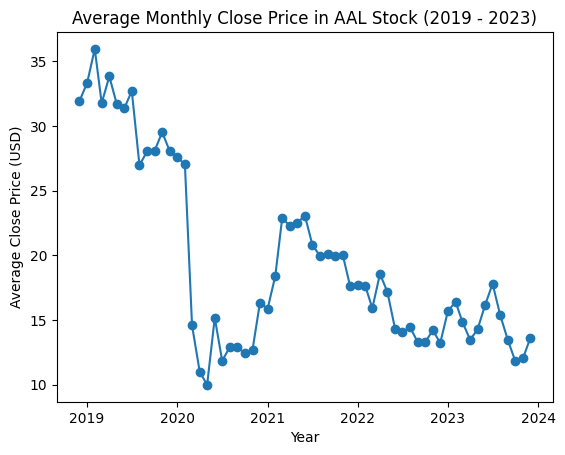

In [ ]:
# Plot 1: Average Monthly Close Price

# Create a new column 'MonthYear' in the stocks DataFrame which contains the month and year associated with the data point.
# The 'to_period()' function used here is a Pandas function which takes a column of date-time values and turns it into a 'PeriodIndex' with a specific
# frequency. Here, the chosen frequency is 'month', or 'M'.
stocks_df['MonthYear'] = stocks_df['date'].dt.to_period('M')

# Group the stocks data by the new 'MonthYear' column and calculate the mean for each month-year combination (i.e. Jan 2019).
# Store the data in a new DataFrame, 'monthly_data.'
monthly_data = stocks_df.groupby('MonthYear').mean()

# Plot the data by month. Note that it is important to first convert the 'MonthYear' data into a form the plot can understand as time data, by using
# the 'to_timestamp()' function. This function takes the 'MonthYear' index, which is in the form of a PeriodIndex with a month frequency, and turns it
# into a 'DateTimeIndex'. I also set the market to be a small circle in order to make it clear where the actual data point lies for each month.
plt.plot(monthly_data.index.to_timestamp(), monthly_data['close'], marker='o')

# Add title and labels.
plt.title('Average Monthly Close Price in AAL Stock (2019 - 2023)')
plt.xlabel('Year')
plt.ylabel('Average Close Price (USD)')

# Show plot.
plt.xticks()
plt.show()

The plot above depicts the monthly average close price for American Airlines. Note that going forward, the plots will be labeled as 2019 - 2023, because though the data begins in November 31, 2018, most of the data falls between 2019 and 2023.

In this plot, each data point represents the average *closing* price across all the days of a particular month. As shown, the period from 2019 to 2020 is characterized by a very steep crash, which suggests a serious decline in the stock's value. Halway through 2020, it rises again pretty abruptly, but not long after 2021 it becomes a gradual descent downwards again. This indicates that American Airlines stock prices have been declining in recent years. It seems plausible that this trend may continue.

The candlestick plot below represents the open, close, high, and low prices at which the stock was sold over the course of each day from July 1, 2023 to August 15, 2023.

<ipython-input-7-83ea992f39de>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df_july['date_num'] = mdates.date2num(stocks_df_july['date'])


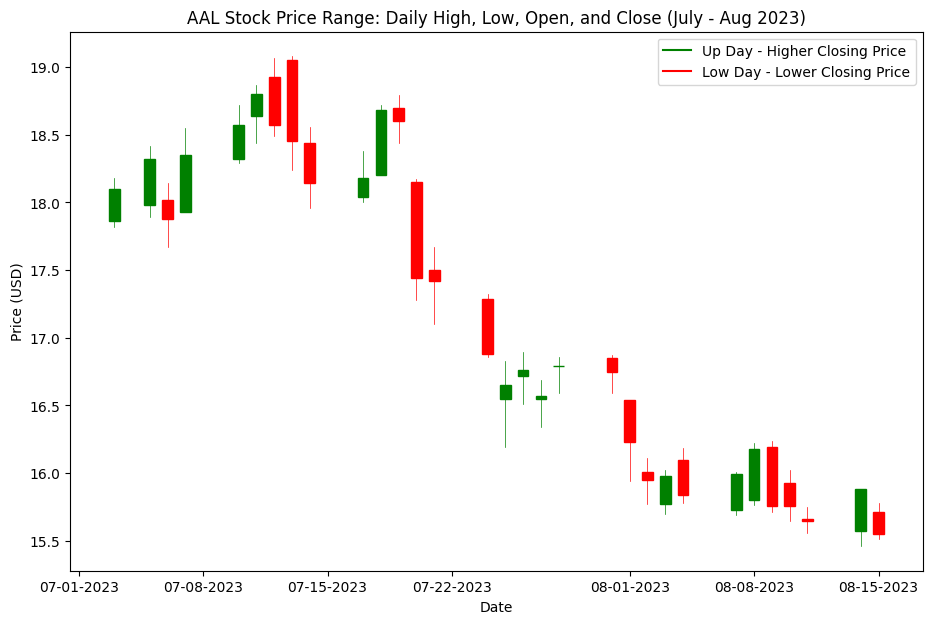

In [ ]:
# Plot 2: Candlestick Plot: Daily Stock Price Highs, Lows, Ups, and Downs (July - Aug 2023)
# For this plot, I use the 'candlestick_ohlc' function from the 'mpl_finance' module.

# Create DataFrame that is a subset of the original 'stocks_df'; comprising only data from the dates of July 1, 2023 to August 15, 2023.
stocks_df_july = stocks_df[(stocks_df['date'] >= '2023-07-01') & (stocks_df['date'] <= '2023-08-15')]

# Set the plot size.
figure, axes = plt.subplots(figsize=(11, 7))

# Create a new column to represent date in the numerical format expected by the 'candlestick_ohlc' function.
stocks_df_july['date_num'] = mdates.date2num(stocks_df_july['date'])

# 'ohlc' is for containing the Open, High, Low, Close price data for each date in 'stocks_df_july' in the correct form for the 'candlestick_ohlc' function.
# For every day, the code below appends a tuple containing the 'date', 'open', 'high', 'low', and 'close' values for that day to the 'ohlc' list.
ohlc = []
for inD, Row in stocks_df_july.iterrows():
    date_num = Row['date_num']
    open_price = Row['open']
    high_price = Row['high']
    low_price = Row['low']
    close_price = Row['close']
    ohlc.append((date_num, open_price, high_price, low_price, close_price))

# Create the candlestick plot. 'axes' represents the axis of the plot, set earlier and 'ohlc' refers to the 'Open, High, Low, Close data'.
# The color is green to represent 'up' days and red to represent 'down' days.
# The width parameter specifies the width of the bars.
candlestick_ohlc(axes, ohlc, width=0.6, colorup='g', colordown='r')

# Use the matplotlib method 'xaxis_date()' to format the values on the x-axis as dates.
axes.xaxis_date()

# Tell the plot to format the dates in the form of month-day-year.
axes.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

# Create the values for the legend.
legend_values = [Line2D([0], [0], color='g', label='Up Day - Higher Closing Price'),
                   Line2D([0], [0], color='r', label='Low Day - Lower Closing Price')]

# Specific the values for the legend as well as the location.
axes.legend(handles=legend_values, loc='upper right')

# Add a title and axis labels.
plt.title('AAL Stock Price Range: Daily High, Low, Open, and Close (July - Aug 2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.show()

The candlestick plot is a plot often used to represent prices in stock market data. Each individual bar represents the prices on a single day. The thin lines (the 'wick' of the candle) represent the high and low prices for that day. The top of the wick represents the high price and bottom of the wick is the low price. The bar, or the 'body' of the candle, represents the open and close prices. For 'up' days, represented in green, the closing price is higher than the opening price, so the top of the bar represents the closing price and the bottom of the bar the close. For 'down' days, represented in red, the opening price is higher than the closing price, so the top of the bar represents the opening price and the bottom represents the close.

One purpose of the plot is to visualize the range of the price values throughout the day. On July 20, there was a huge range of values, meaning that the high price was much higher than the low price. Overall, most days the range seems to hover around 1 unit. The high value is also typically not much higher than the closing value on up days. For this reason, it seems reasonable to use the closing price as a response variable, because it does not tend to be a major outlier in the range of price values.

This plot also makes depicts the relative proportion of 'up' and 'down' days. They are fairly evenly distributed, which suggests that the difference between the opening and closing prices is not very indicative of the overall trends in the stock's value, which decreases significantly starting around July 12.

Next I will create a plot which tracks the average monthly values of a different variable, change over time.

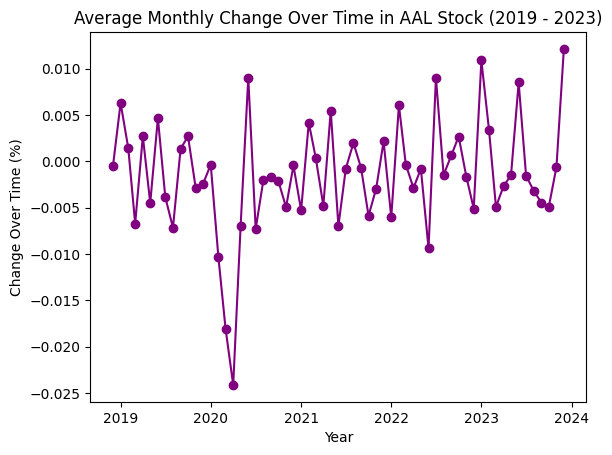

In [ ]:
# Plot 3: Average Monthly Change Over Time

# Use the 'monthly_data' DataFrame from earlier, but this time the 'ChangeOverTime' column.
plt.plot(monthly_data.index.to_timestamp(), monthly_data['changeOverTime'], marker='o', color='purple')

# Add title and labels.
plt.xlabel('Year')
plt.ylabel('Change Over Time (%)')
plt.title('Average Monthly Change Over Time in AAL Stock (2019 - 2023)')

# Display the plot
plt.xticks()
plt.show()

The plot above depicts the monthly average percent change over time for American Airlines from 2019 to 2023. There is a severe dip shortly after 2020, and then a rapid subsequent rise. However, aside from that, the data hovers roughly around a mean of 0. The variance increases slightly after 2022.

At first, I had considered using change over time as a response variable instead of close price. However, in this plot, the change over time variable does not show an obvious trend. While the closing price has decreased over time, the change over time has not exhibited the same trend. One possible reason for this is that percent changes are sensitive to the scale of the values. If the close price has been decreasing for a long time, the impact of each percent change may diminish, which results in what appears to be constancy. For this reason, I decided the closing price would act as a better metric for the value of the stock in this analysis.

Now, I will create plots to assess the relationships between some of the most relevant variables.

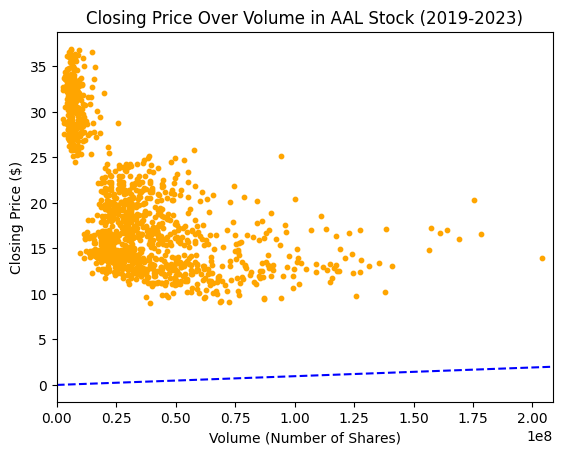

In [ ]:
# Plot 4. Closing Price Vs. Volume

#Create a plot between volume and closing price.
plt.scatter(stocks_df['volume'], stocks_df['close'], s = 10, color = 'orange')

# Add a title and labels.
plt.xlabel('Volume (Number of Shares)')
plt.ylabel('Closing Price ($)')
plt.title('Closing Price Over Volume in AAL Stock (2019-2023)')

# Limit the range of the x-axis because of a few extreme high-lying outliers.
plt.xlim(0, 208583855)

# Add a fitted line.
plt.plot([0, 208583855], [0, 2], color='blue', linestyle='--')

plt.show()

Plot 4, above, represents the relationship between closing price, in USD, and volume. It is difficult to find a relationship in the data points themselves. The fitted line shows a positive relationship between closing price and volume. It is not clear if this line is trustworthy, but a positive relationship would make sense. This is because volume represents the total number of shares bought or sold during a given day, while closing price represents the price of the last share sold on a given day. Volume tends to represent market interest, and closing price represents stock value. Thus, it is intuitive that greater market interest would be associated with higher stock value. More analysis is required to verify this relationship.

Text(0.5, 1.0, 'Closing Price Over Volume Weighted Average Price (VWAP) in AAL Stock (2019 - 2022)')

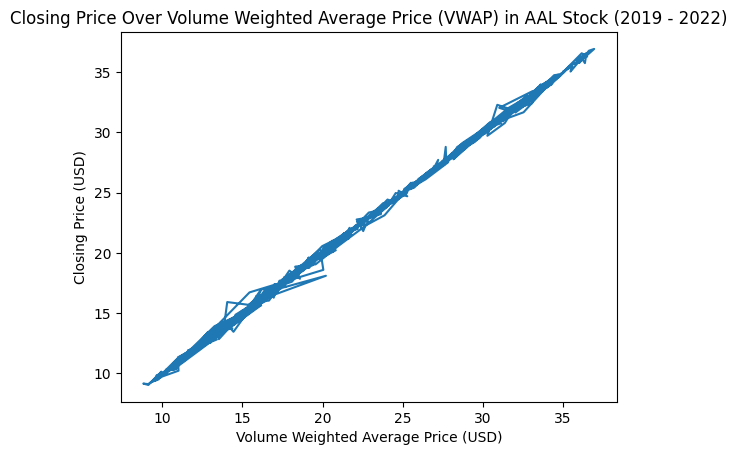

In [ ]:
#Plot 5: Closing Price vs. Volume Weighted Average Price

# Create a plot between volume and closing price.
plt.plot(stocks_df['vwap'], stocks_df['close'])

# Add a title and labels.
plt.xlabel('Volume Weighted Average Price (USD)')
plt.ylabel('Closing Price (USD)')
plt.title('Closing Price Over Volume Weighted Average Price (VWAP) in AAL Stock (2019 - 2022)')

Plot 5, above, represents the relationship between closing price, in USD, and volume weighted average price (VWAP), in USD. There is a direct positive relationship between the two variables.

VWAP is a weighted average that reflects the number of trades made at different price points during a specific day. It thus reflects all stock trades, not just the final stock trade of the day. Therefore, if it is closely related to closing price, this suggests that stock prices may tend to remain fairly constant throughout the day. This may mean that the closing stock price may be an accurate reflection of the stock prices throughout the day, which is further evidence that it is a good choice for the response variable. It also means that VWAP may be useful for predicting future values of the close variable.

Below, I plot the relationship between the change and the closing price variable.

(-2.0, 2.0)

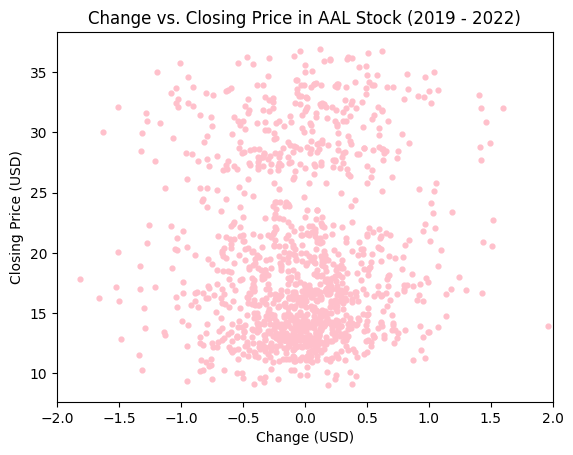

In [ ]:
# Plot 6: Change vs. Closing Price

# Create a plot between change over time and closing price.
plt.scatter(stocks_df['change'], stocks_df['close'], s = 12, color = 'pink')

# Add a title and labels.
plt.xlabel('Change (USD)')
plt.ylabel('Closing Price (USD)')
plt.title('Change vs. Closing Price in AAL Stock (2019 - 2022)')

plt.xlim(-2, 2)

Plot 6, above, represents the relationship between closing price and change, both in USD. There is not a clear relationship. This means that for every individual date, the closing price is not necessarily a reflection of the value of the change variable for that day. The change variable for a particular day is equal to the closing price for that day minus the closing price for the day before.

However, though the change value on a single day may not be very informative, it is still possible that the overall trend of the change variable over time is useful in the context of a time series for predicting future closing price variables.

# Data Analysis
## Stage 1: ARIMA Model

Now it is time to perform the data analysis.

The first time series I will implement is an ARIMA model. An ARIMA (AutoRegressive Integrated Moving Average) model is a type of time series model. There are three main components to this model.

The first characteristic of the model is that it is ("AR") autoregressive, meaning that it predicts future values based on past values based on the implicit assumption that the future will resemble the past. The current value of the variable is modeled as a linear combination of its past values. The parameters of the ARIMA model are 'p', 'd', and 'q', and 'p' refers to the number of past values (lags) of the variable considered in the model (Pathak).

The second component of the model depends on 'moving averages' (MA). Moving average models represent the response variable as a linear combination of its past error terms. The parameter 'q' specifies the number of past errors considered in the model (Pathak).

Finally, the integrated (I) component involves making the data stationary by creating new values equal to the difference between past and current values of a particular variable. This parameter 'd' is associated with this component, and specifies the number of times the differencing operation is used in the time seires.  

Using Auto-ARIMA is one way to determine the best parameters to use for the ARIMA model. Auto-Arima takes the data and fits many models in a different order before comparing their accuracy (Hayes).

In [ ]:
# In Arima, there are arguments p, d, and q.
# We use Auto Arima in advance to identify what paramters we should use.
model = auto_arima(stocks_df['close'], seasonal=False, trace=True)
print(model.summary())

#Now we see that (2,1,2) is optimal, with the lowest AIC value.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2487.986, Time=3.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2496.158, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2489.444, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2489.157, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2494.786, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2491.348, Time=2.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2490.185, Time=3.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2490.188, Time=3.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2490.282, Time=4.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2491.138, Time=1.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2488.556, Time=5.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2488.430, Time=0.80 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2491.775, Time=5.40 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2486.637, Time=1.49 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In the output above, it is clear that (2,1,2) are the parameters associated with the best model fit, as it is associated with the lowest AIC value. The next step is to implement an ARIMA model on the data with these parameters.



In [ ]:
# Input the best parameters.
p, d, q = 2, 1, 2

# Fit the ARIMA model using the response variable 'close', or daily closing price.
arima_model = ARIMA(stocks_df['close'], order=(p, d, q))
arima_output = arima_model.fit()

# Print summary of ARIMA model.
print(arima_output.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1238.319
Date:                Thu, 14 Dec 2023   AIC                           2486.637
Time:                        03:58:56   BIC                           2512.319
Sample:                             0   HQIC                          2496.289
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8766      0.123      7.106      0.000       0.635       1.118
ar.L2         -0.6092      0.120     -5.075      0.000      -0.844      -0.374
ma.L1         -0.7993      0.134     -5.967      0.0

The table above shows the summary output for the ARIMA model.

The first coefficients listed are associated with the 'AR' component of the model. The coefficient for the first lag, ar.L1, is 0.8766, and the coefficient for the second lag, ar.L2, is -0.6092. This means that for each increase in the first lag of the time series, the current value of the time series is expected to increase by 0.8766, while each increase in the second lag is associated with an expected decrease by 0.6092.

The second coefficients listed are associated with the 'MA' component of the model. The coefficient for the first lag is -0.7993 and the coefficient for the second lag is 0.5281. This means that  each unit increase in the first lag of the moving average component is associated with a decrease of 0.7993 in the current value of the time series, while each unit increase of the second lag is associated with an increase of 0.5281.

The estimated variance of the error terms is 0.4199.

Each of the coefficients has a p-value which approaches 0, which is a good sign as it indicates they are all statistically significant. Also, the output of the Ljung-Box Test is a low statistic and a high p-value, which is also a good sign as it does not provide evidence to suggest that there is high autocorrelation in the residuals.

Overall, the ARIMA model seems to provide a reasonable modeling fit for predicting the stock's closing price. In the next step, I use the model to make predictions and compare them to the actual closing prices in order to calculate the MSE and evaluate the model's predictive accuracy.




In [ ]:
# Recreate the 'stocks_df' DataFrame to ensure that it is as expected.
stocks_df = pd.DataFrame(data = finance_data)

# Make a copy of the 'stocks_df' DataFrame and call it 'stocks_df2'.
stocks_df2 = stocks_df.copy()

# Drop the 'label' column, as it does not contain numerical data.
stocks_df2 = stocks_df2.drop('label', axis=1)

# Convert 'date' to datetime format.
stocks_df2['date'] = pd.to_datetime(stocks_df2['date'])

# Set 'date' as index.
stocks_df2.set_index('date', inplace=True)

# Ensure the index is monotonic (constantly increasing) and set frequency to business days. This is because I discovered that setting the frequency to 'D'
# is not correct because this means that the frequency is set to every day. However, in the stock market, the stocks are only open for trading on Monday
# through Friday, or the 'business' days of the week. If this step is not taken, the code will incorrectly assume that there must be a date for everyday,
# and will thus input weekend days and fill in the data with NA values.
stocks_df2 = stocks_df2.sort_index().asfreq('B')

# Fill in any missing values in the data by 'interpolating' the values from the rows above and below it. Interpolating is a mathematical technique to
# estimate values that fall between known values in a set of data points.
stocks_df2 = stocks_df2.interpolate()

# Split the data into training and validation sets. The training set contsists of the first 80% of the data, and the validation set contains the last 20%.
training_length = int(len(stocks_df2) * 0.8)
training_set, validation_set = stocks_df2[0:training_length], stocks_df2[training_length:]

# Train and fit the ARIMA model on the training data. The optimal parameters are (2,1,2), as we found earlier. The variable of interest is 'close'.
parameters = (2, 1, 2)
model = ARIMA(training_set['close'], order=parameters)
fit_arima_model = model.fit()

# Use the predict() time series function to make predictions on just the validation est.
end = len(stocks_df2) - 1
predictions = fit_arima_model.predict(start=len(training_set), end=end, dynamic=False)

# Calculate the MSE (Mean Squared Error) by comparing the actual values of the closing price in the validation set to the predictions.
mse = mean_squared_error(validation_set['close'], predictions)
print('The Mean Squared Error is:', mse)

The Mean Squared Error is: 4.835774490090387


The mean-squared error for the ARIMA model is about 4.836, which means that on average, the squared difference between the ARIMA model's predicted closing prices and the actual closing prices is about 4.836. The overall range of the 'close' variable is about 28, so 4.836 seems like a reasonable MSE, but not outstanding.

## Stage 2: VAR Model


The ARIMA model only takes into account the lagged values of the closing variable itself.

The VAR model, on the other hand, is able to model multiple time series, describing the changes in a set of variables over time, where each variable is a linear combination of its past values as well as the past values of other variables. "VAR" stands for "Vector autoregression" (Prakhar).

When fitting a VAR model, a good first step is to check to see if the variables are stationary. Stationary variables have fairly constant mean and variance.

In [ ]:
# Use the Augmented Dickey-Fuller test to check if each variable in the DataFrame is stationary.
for variable in stocks_df2.columns:
    output = adfuller(stocks_df2[variable])
    if output[1] > 0.05:
        print(variable + ' is not stationary.')
    else:
        print(variable + ' is stationary.')

open is not stationary.
close is not stationary.
high is not stationary.
low is not stationary.
adjClose is not stationary.
volume is stationary.
unadjustedVolume is stationary.
change is stationary.
changePercent is stationary.
vwap is not stationary.
changeOverTime is stationary.


The ADF test checks if each variable is stationary. A high value (over 0.05) implies that the variable is not stationary, and a low value (under 0.05) implies that it is. In this case, the variables 'open', 'close', 'high', 'low', 'adjusted close', and 'vwap' are considered not stationary, while 'volume', 'unadjusted volume', 'change', 'change percent', and 'change over time' are considered stationary. The VAR model assumes that the variables are stationary, meaning that the relationships between the variables and their past values remains constant over time. For this reason, we will only use the stationary variables in the VAR model.   

In [ ]:
# Specify the list of stationary columns based on your ADF test. Vwap is not technically stationary, but it is closer to stationary than some of the
# other variables. This is a slight limitation in this model.
stationary_columns = ['volume', 'unadjustedVolume', 'change', 'changePercent', 'vwap', 'changeOverTime']

# Create a new DataFrame 'stationary_df' with only the stationary columns.
stationary_df = stocks_df2[stationary_columns].copy()

# Use StandardScaler to normalize the data. This is a common step in Time Series models because it scales the predictors to a similar range, helping
# improve numerical stability (rounding issues, etc.). For instance, the the 'volume' variable is on a massive scale, up to the millions, while the 'close'
# variable is nowhere near that.
scaler = StandardScaler()
stationary_df_scaled = pd.DataFrame(scaler.fit_transform(stationary_df), columns=stationary_df.columns)

# Split the data into training and validation sets. The training set contsists of the first 80% of the data, and the validation set contains the last 20%.
training_length = int(len(stationary_df_scaled) * 0.8)
training_set, validation_set = stationary_df_scaled[0:training_length], stationary_df_scaled[training_length:]

# Fit the VAR model on the training set.
var_model = VAR(training_set)
var_output = var_model.fit()

# Make predictions on the test set using the model. Use the 'forecast()' function for VAR models.
predictions = var_output.forecast(training_set.values, steps=len(validation_set))

# Find the Mean Squared Error (between actual validation set value and the model predictions).
mse = mean_squared_error(validation_set, predictions)
print('Mean Squared Error: ' + str(mse))

Mean Squared Error: 0.45942261942524776


The Mean Squared Error for this initial VAR model is 0.4597. Keep in mind that the data was scaled.

However, an important step is to look for multicollinearity between the variables. Variables in the model should not be highly correlated. Below, I use the VIF test to assess the multicollinearity between the variables.

In [ ]:
# Create a new DataFrame 'X'. Each column, besides the first, will represent a different variable. The first column will be the constant column, for which
# each row contains a 1. This is necessary for the VIF process.
X = pd.DataFrame({'const': 1, 'volume': training_set['volume'], 'unadjustedVolume': training_set['unadjustedVolume'],
                  'change': training_set['change'], 'changePercent': training_set['changePercent'],
                  'vwap': training_set['vwap'], 'changeOverTime': training_set['changeOverTime']})

# Calculate VIF for each variable.
vif_values = []
# X.shape[1] is equal to the number of columns in X, or the number of variables.
for i in range(X.shape[1]):
    # Calculate the VIF for the values of one particular row of X.
    vif = variance_inflation_factor(X.values, i)
    # Add the VIF value for a variable to the list.
    vif_values.append(vif)

# Create the 'vif_df' Dataframe in order to print out the results.
vif_data = pd.DataFrame(columns=['Variable', 'VIF'])
vif_data['Variable'] = X.columns
vif_data['VIF'] = vif_values

# Print the VIF values for each variable.
print(vif_data)

           Variable           VIF
0             const  1.062507e+00
1            volume  3.397035e+04
2  unadjustedVolume  3.396474e+04
3            change  9.059459e+00
4     changePercent           inf
5              vwap  1.495674e+00
6    changeOverTime           inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Now I will try the VAR model again, this time taking out some of the variables with high multicollienarity. As shown above, volume and unadjusted volume are correlated. Change percent, change over time, and change are also highly correlated.

The first time I tried the VAR model without unadjusted volume and change percent. This resulted in an MSE of 0.3925. After also taking out change, the MSE rose to 0.42118.

However, the best implementation of the VAR model was after removing the change over time variable as well. The variables in the model are 'close', 'volume', 'change', and 'vwap'.

In [ ]:
# Create a new list of stationary columns, this time ommitting unadjusted volume, change over time, and change percent.
stationary_columns = ['volume', 'change', 'vwap', 'close']

# Create a new DataFrame with these columns.
stationary_df = stocks_df2[stationary_columns].copy()

#  StandardScaler to normalize the data.
scaler = StandardScaler()
stationary_df_scaled = pd.DataFrame(scaler.fit_transform(stationary_df), columns=stationary_df.columns)

# Split the data into training and validation sets. The training set contsists of the first 80% of the data, and the validation set contains the last 20%.
training_length = int(len(stationary_df_scaled) * 0.8)
training_set, validation_set = stationary_df_scaled[0:training_length], stationary_df_scaled[training_length:]

# Fit the VAR model on the training set.
var_model = VAR(training_set)
var_output = var_model.fit()

# Make predictions on the test set using the model. Use the 'forecast()' function for VAR models.
predictions = var_output.forecast(training_set.values, steps=len(validation_set))

# Find the Mean Squared Error (between actual validation set value and the model predictions).
mse = mean_squared_error(validation_set, predictions)
print('Mean Squared Error: ' + str(mse))

Mean Squared Error: 0.32624014120597133


The MSE for the VAR model which contains 'close', 'volume', 'change', and 'vwap' is 0.3262, which is the lowest MSE yet. Note that this is the MSE after scaling the variables.

However, this MSE is an average for the MSE over all variables present in the VAR model. It also is based on scaled data. Below, I calculate the MSE for the unscaled data, specifically for the 'close' variable. This is the variable of interest and the focus of this project.

In [ ]:
# Get an unscaled version of predictions as well as the actual values (from the validation set).
predictions_unscaled = scaler.inverse_transform(predictions)
validation_set_unscaled = scaler.inverse_transform(validation_set)

# Only take the third column, i.e. only the data associated with the 'close' variable.
close_values_actual = validation_set_unscaled[:,3]
close_values_predicted = predictions_unscaled[:,3]

# Calculate the MSE for the 'close' variable.
mse_close = mean_squared_error(close_values_actual, close_values_predicted)
print('Mean Squared Error: ' + str(mse_close))

Mean Squared Error: 5.654489957552245


The mean squared error associated with the closing price variable for the unscaled data is about 5.655. This is higher than the MSE for the ARIMA model, which was 4.838. This suggests that the ARIMA model is more effecive in this context.

I will now look further into information about the model summary, as well as create plots to depict the distributions of all four variables in the model.

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, Dec, 2023
Time:                     03:58:58
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -13.8594
Nobs:                     1042.00    HQIC:                  -13.9184
Log likelihood:           1376.12    FPE:                8.70295e-07
AIC:                     -13.9544    Det(Omega_mle):     8.53789e-07
--------------------------------------------------------------------
Results for equation volume
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.061137         0.020732            2.949           0.003
L1.volume         0.665527         0.022602           29.446           0.000
L1.change         0.078932         0.028897            2.732           0.00

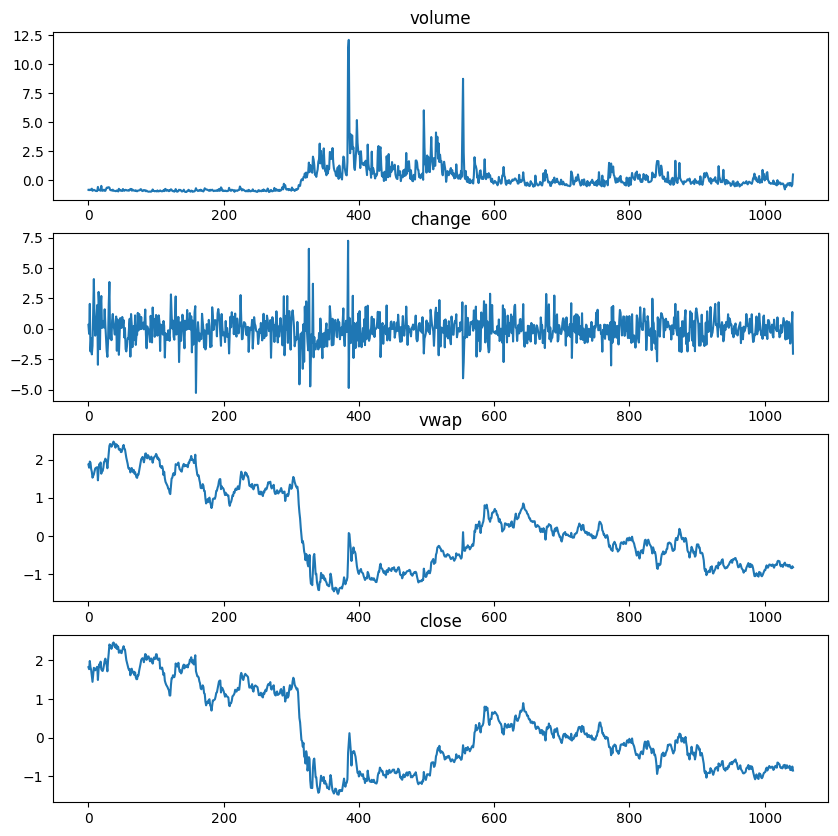

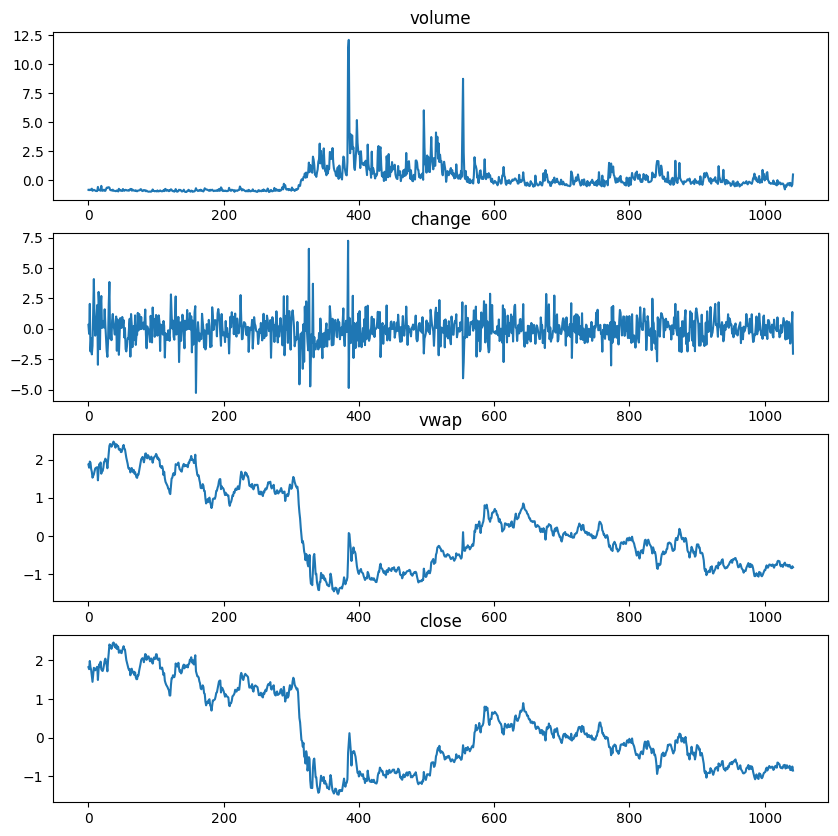

In [ ]:
print(var_output.summary())
var_output.plot()

As shown in the summary above for the 'close' variable, only the 'change', 'vwap', and 'close' variables were statistically significant, with p-values of 0.028, 0.031, and less than 0.001, respectively.

The L1.change coefficient is 0.0095, which suggests that a one-unit increase in the change variable is associated with a 0.0095 unit increase in the closing price variable. The coefficient associated with 'vwap' is 0.2926, meaning that a one-unit increase in 'vwap' is associated with a 0.2926-unit increase in 'close'. Finally, the 'close' coefficient is 0.7018, which suggests that an increase in the past value of 'close' is associated with a 0.7018-unit increase in the next value of 'close.'

Because 'change' is equal to today's closing price minus yesterday's, and 'vwap' represents the volume-weighted average price, it makes sense that both are positively associated with future values of the closing price. Overall, the results of the model suggest that higher closing prices, and a trend towards increasing closing prices, is associated with higher closing prices in the future. In other words, the past may truly be informative for predicting future, in the context of this stock's closing price.

Finally, the plot below displays the VAR model's predicted closing price values, as compared to the actual closing prices.

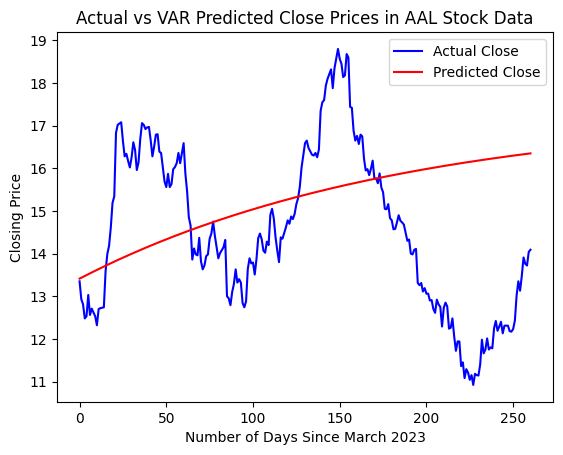

In [ ]:
# Plot 7: Actual vs. Predicted Close Values for VAR Model

# Plot actual closing price values from the validation set.
plt.plot(close_values_actual, label='Actual Close', color='blue')

# Plot the closing price values predicted by the VAR model.
plt.plot(close_values_predicted, label='Predicted Close', color='red')

# Add a title and labels.
plt.xlabel('Number of Days Since March 2023')
plt.ylabel('Closing Price')
plt.title('Actual vs VAR Predicted Close Prices in AAL Stock Data')
plt.legend()
plt.show()

The plot above compares the trajectory of the actual and predicted closing price in the period represented by the validation set, which is roughly from March to December of 2023.

As shown above, the VAR model's predicted trend for the closing prices in the days following March 2023 is a serious oversimplification. The VAR model, in red, predicted a curved increase in the closing price over time. In contrast, the closing prices actually experienced some significant peaks and falls, and did not show signs of a constant increase.

Overall, of the two models, the ARIMA model performed better than the VAR model, with an MSE of 4.838, as compared to the VAR model's 5.654.

# Conclusion

Time series present one strategy for grappling with the challenging task of making stock market predictions. In this project, I implemented an ARIMA model and a VAR model to predict closing price based on stock data from American Airlines in the period from November 2018 to December 2023. The ARIMA model outperformed the best VAR model. Some limitations of the study include the fairly brief duration of the period from which the data was collected, as well as the non-stationary nature of the 'vwap' variable in the best-performing VAR model.

However, the findings are still interesting. In the ARIMA model, there is statistical significance to suggest that closing price values from the past help inform predictions for future closing prices. Similarly, in the VAR model, there is statistically significant evidence to suggest that the past values of the volume weighted average price, the change in closing price, and the closing price itself, are associated with changes in future closing price values. This provides counterevidence to the Random Walk Theory, which claims that past trends do not usefully inform stock market predictions. Future studies may involve experimentation with other types of time series models, or train the model on data collected over a longer period of time.

# References

“Adjusted vs Unadjusted Prices.” Koyfin Help, Koyfin Help, 19 Nov. 2020, www.koyfin.com/help/adjusted-vs-unadjusted-prices/.

“Candlestick OHLC Graphs with Matplotlib.” PythonProgramming.Net, pythonprogramming.net/candlestick-ohlc-graph-matplotlib-tutorial/. Accessed 1 Dec. 2023.

Chen, James. “Change: What It Means, How It Works, Calculation.” Investopedia, Investopedia, 18 Apr. 2022, www.investopedia.com/terms/c/change.asp.

Data provided by Financial Modeling Prep: “Free Stock Market API and Financial Statements API .” FMP, site.financialmodelingprep.com/developer/docs. Accessed 4 Dec. 2023.   

Fernando, Jason. “Relative Strength Index (RSI) Indicator Explained with Formula.” Investopedia, Investopedia, 31 Mar. 2023, www.investopedia.com/terms/r/rsi.asp.

Ganti, Akhilesh. “Adjusted Closing Price: How It Works, Types, Pros & Cons.” Investopedia, Investopedia, 28 Dec. 2020, www.investopedia.com/terms/a/adjusted_closing_price.asp.

Hayes, Adam. “Autoregressive Integrated Moving Average (ARIMA) Prediction Model.” Investopedia, Investopedia, 29 Sept. 2023, www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp.

Hayes, Adam. “What Are Common Strategies for Using Volume Weighted Average Price?” Investopedia, Investopedia, 31 July 2023, www.investopedia.com/ask/answers/031115/what-common-strategy-traders-implement-when-using-volume-weighted-average-price-vwap.asp#:~:text=Volume%2Dweighted%20average%20price%20(VWAP)%20is%20a%20commonly%20used,over%20a%20particular%20time%20frame.

Hayes, Adam. “What Is Volume of a Stock, and Why Does It Matter to Investors?” Investopedia, Investopedia, www.investopedia.com/terms/v/volume.asp#:~:text=A%20stock’s%20volume%20is%20the,and%20trading%20activity%20is%20increasing. Accessed 2 Dec. 2023.

Iordanova, Tzveta. “An Introduction to Non-Stationary Processes.” Investopedia, Investopedia, 5 Jan. 2022, www.investopedia.com/articles/trading/07/stationary.asp.

“Net Change.” Corporate Finance Institute, CFI, 19 Mar. 2023, corporatefinanceinstitute.com/resources/wealth-management/net-change/.

Pathak, Prabhat. “Building an ARIMA Model for Time Series Forecasting in Python.” Analytics Vidhya, Analytics Vidhya, 25 Oct. 2023, www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/.

Prakhar, Kumar, et al. “Effective Stock Price Prediction Using Time Series Forecasting .” IEEE Xplore, IEEE, 24 May 2022, ieeexplore.ieee.org/abstract/document/9776830.

Prasad, Eswara. “What Is Auto-Arima?” Medium, featurepreneur, 20 May 2021, medium.com/featurepreneur/what-is-auto-arima-b8025c6d732d.

“Price Graphs: Why Not Percent Change?” Personal Finance & Money Stack Exchange, 1 Apr. 2013, money.stackexchange.com/questions/21601/price-graphs-why-not-percent-change.

Rouf, Nusrat, et al. “Stock Market Prediction Using Machine Learning Techniques: A Decade Survey on Methodologies, Recent Developments, and Future Directions.” MDPI, Multidisciplinary Digital Publishing Institute, 8 Nov. 2021, www.mdpi.com/2079-9292/10/21/2717.

Salvucci, Jeremy. “What Are Opening & Closing Prices in the Stock Market?” TheStreet, TheStreet, Inc., 20 Sept. 2022, www.thestreet.com/dictionary/o/opening-and-closing-prices.

Shen, Jingyi, and M. Omair Shafiq. “Short-Term Stock Market Price Trend Prediction Using a Comprehensive Deep Learning System - Journal of Big Data.” SpringerOpen, Springer International Publishing, 28 Aug. 2020, journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00333-6.

Vijh, Mehar, et al. “Stock Closing Price Prediction Using Machine Learning Techniques.” Procedia Computer Science, Elsevier, 16 Apr. 2020, www.sciencedirect.com/science/article/pii/S1877050920307924.

Vstar.com. “Why Is the Stock Market So Difficult to Predict?” Medium, Medium, 31 Oct. 2023, medium.com/@vstar.com/why-is-the-stock-market-so-difficult-to-predict-d914a8b5ed35#:~:text=As%20soon%20as%20news%20is,manner%20that%20defies%20logical%20explanation.

Yates, Tristan. “4 Ways to Predict Market Performance.” Investopedia, Investopedia, 10 July 2023, www.investopedia.com/articles/07/mean_reversion_martingale.asp.
